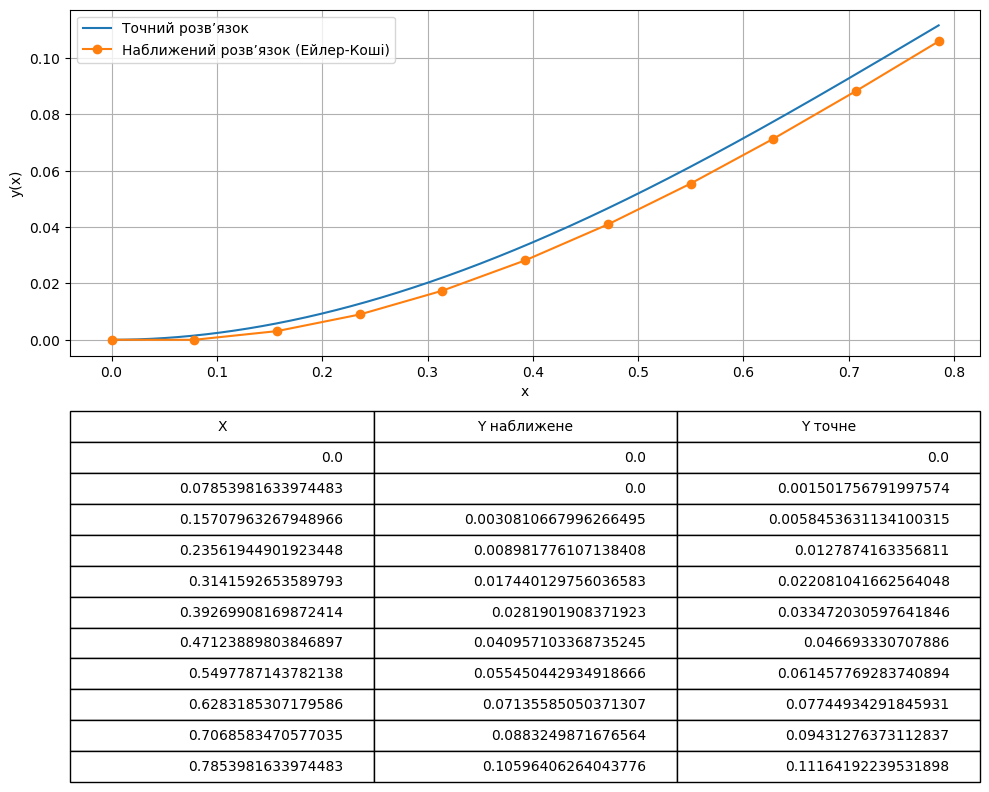

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd  # import pandas

# Визначаємо функцію рівняння із умови
def func(y, x):
    return (np.sin(2 * x) / (2 - np.sin(x) ** 2) - 2 * y) / 2

# Реалізація методу Ейлера-Коші де крок ітерації визначено як:
# x[i+1] = x[i] + h
def euler_cauchy(func, x0, y0, h, x_end):
    x, y = [x0], [y0]
    while x[-1] < x_end:
        # Модифікований метод Ейлера може забезпечити краще наближення
        # y_new = y[-1] + h * func(y[-1] + h / 2 * func(y[-1], x[-1]), x[-1] + h / 2)
        y_new = y[-1] + h * func(y[-1], x[-1])
        x_new = x[-1] + h
        x.append(x_new)
        y.append(y_new)
    return np.array(x), np.array(y)

# Визначаємо початкові параметри за умовою
x0, y0 = 0, 0
h = np.pi / 40
x_end = np.pi / 4
x_exact = np.linspace(x0, x_end, 1000)

# Розв'язуємо задачу за допомогою методу Ейлера-Коші
x_approx, y_approx = euler_cauchy(func, x0, y0, h, x_end)

# Отримуємо точний розвʼязок задачі за допомогою вбудованого розв'язувача odeint 
# (ODE з англ. Ordinary Differential Equation) або звичайне диференціальне рівняння)
# Він базується на методах Ліндштедта і Булірша-Стоера з допоміжною обробкою. 
# Ці методи є надійними та ефективними для розв'язання широкого спектра задач.
y_exact = odeint(func, y0, x_exact).flatten()

# Для коретного порівняння значень у таблиці потрібно виконати лінійну інтерполяцію
# Оскільки метод Ейлера-Коші рахує значення y на основі x що зростає з кроком h
# Метод odeint не викоистовує власне визначення кроку
y_exact_interpolated = np.interp(x_approx, x_exact, y_exact)

# Побудова графіків точного і наближеного розв'язків
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)

plt.plot(x_exact, y_exact, label='Точний розв’язок')
plt.plot(x_approx, y_approx, 'o-', label='Наближений розв’язок (Ейлер-Коші)')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.grid()

# Побудова таблиці значень
plt.subplot(2, 1, 2)

cell_text = []
for xi, y_approx_i, y_exact_i in zip(x_approx, y_approx, y_exact_interpolated):
    cell_text.append([xi, y_approx_i, y_exact_i])

table = plt.table(cellText=cell_text, colLabels=['X', 'Y наближене', 'Y точне'], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

plt.axis('off')

plt.tight_layout()
plt.show()